In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
arr = np.load('perfmat1464470246.npy')

This model was trained with 30 epochs using X, U, V branches that had _no pre-training_ on single view samples with shifts and flips.

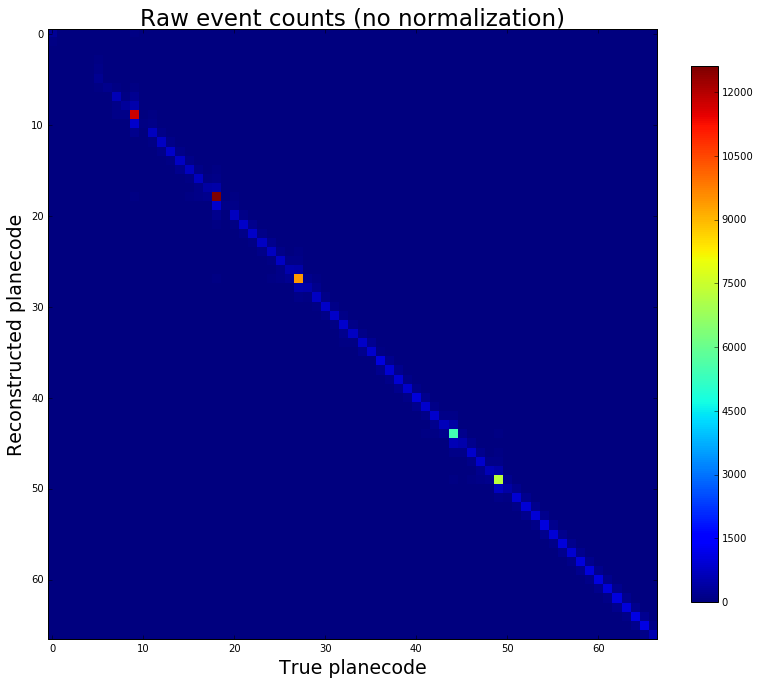

In [9]:
fig = plt.figure(figsize=(12,12))
plt.imshow(arr, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar(fraction=0.04)
plt.title("Raw event counts (no normalization)", fontsize=23)
plt.xlabel('True planecode', fontsize=19)
plt.ylabel('Reconstructed planecode', fontsize=19)
fig.savefig('planecode_raw_event_count_1464470246.pdf')

We column normalize (divide by `axis=0` to get the _efficiency_ - it is saying "okay, I have an event really coming from target 1 (reading the "y-axis"), was it reconstructed in target 1?, etc. (reading along the x for a given y)"

In [5]:
eff = np.zeros_like(arr)
for i in range(np.shape(arr)[0]):
    eff[:, i] = arr[:, i] / arr.sum(axis=0)[i]

/Users/perdue/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


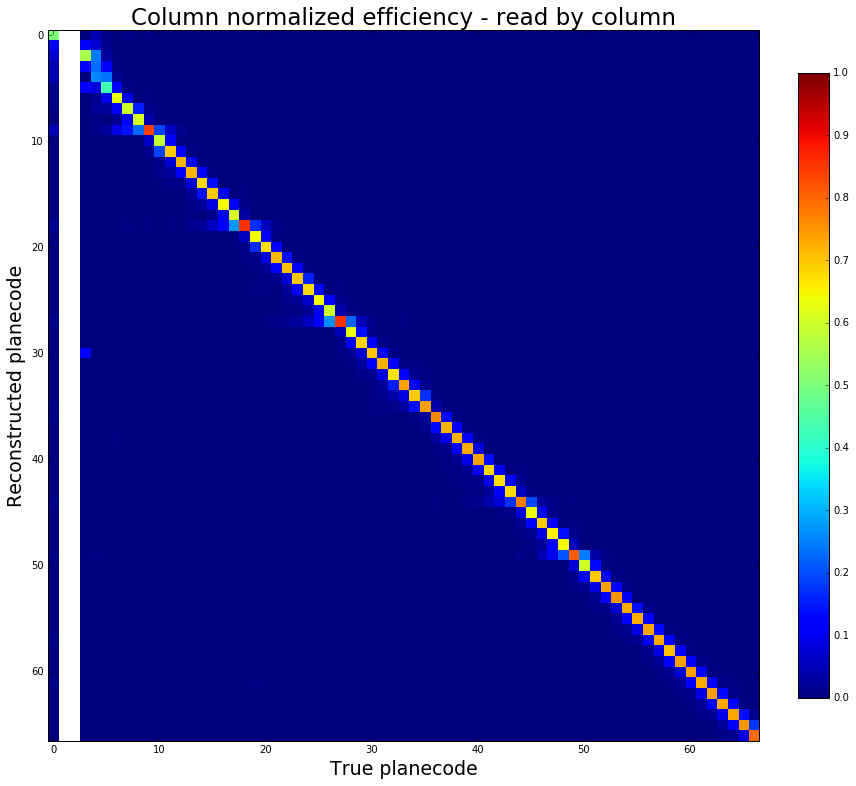

In [10]:
fig = plt.figure(figsize=(14,14))
plt.imshow(eff, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)
plt.colorbar(fraction=0.04)
plt.title("Column normalized efficiency - read by column", fontsize=23)
plt.xlabel('True planecode', fontsize=19)
plt.ylabel('Reconstructed planecode', fontsize=19)
fig.savefig('planecode_column_normalized_1464470246.pdf')

We row normalize (divide by `axis=1` to get the _purity_ - it is saying "okay, I reconstructed an event in target 1, what fraction of the events really come from target 1? what fraction came from other planecodes?, etc."

In [7]:
pur = np.zeros_like(arr)
for i in range(np.shape(arr)[0]):
    pur[i, :] = arr[i, :] / arr.sum(axis=1)[i]

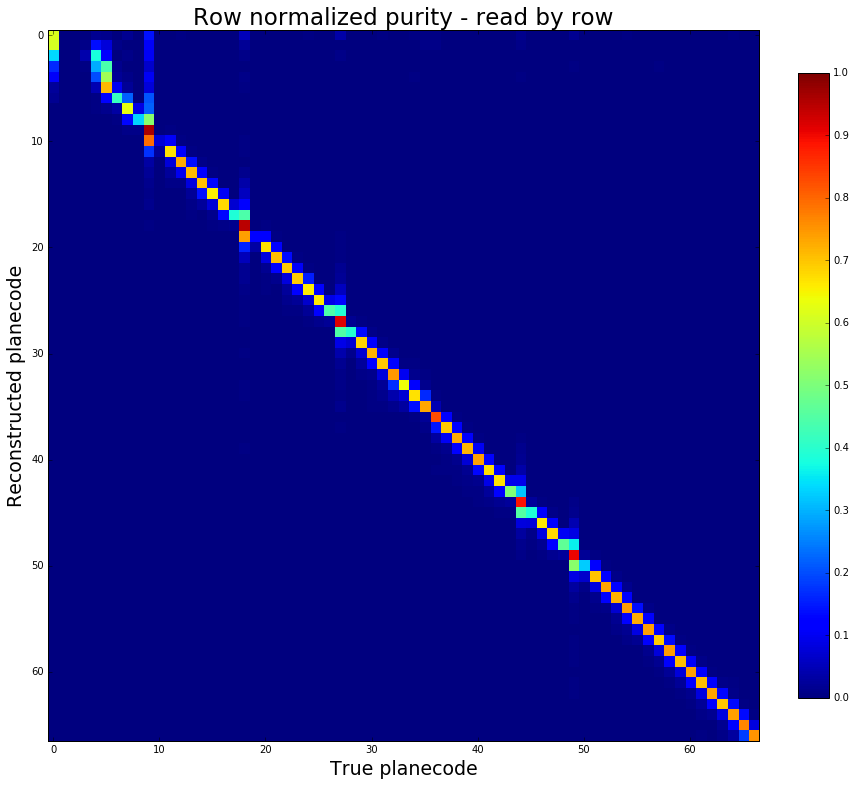

In [11]:
fig = plt.figure(figsize=(14,14))
plt.imshow(pur, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)
plt.colorbar(fraction=0.04)
plt.title("Row normalized purity - read by row", fontsize=23)
plt.xlabel('True planecode', fontsize=19)
plt.ylabel('Reconstructed planecode', fontsize=19)
fig.savefig('planecode_row_normalized_1464470246.pdf')